# Data Cleaning: Airbnb Listings

In [101]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import math
import pylab
import scipy.stats as stats
%matplotlib inline

In [111]:
    cols = [
    'id',
    'host_id',
    'zipcode',
    'property_type',
    'room_type',
    'accommodates',
    'bedrooms',
    'beds',
    'bed_type',
    'price',
    'number_of_reviews',
    'review_scores_rating',
    'host_listing_count',
    'availability_30',
    'minimum_nights',
    'bathrooms'
]

data = pd.read_csv(r'C:\Users\wikie\Documents\Datasets\AirBnB_listing.csv', usecols=cols)

C:\Users\wikie\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [112]:
data.head(10)

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,"Brooklyn sheepshead bay""",40.58,14072,$10.00,2,5,4 days ago,20.0,50.0,80,8000,10.0,10,NaN,NaN,NaN
1,"an/ll/lol/""",40.6498,14072,$0.00,1,5,2 months ago,30.0,60.0,90,8000,NaN,NaN,NaN,NaN,NaN
2,2953058,1.1775e+06,11205,House,Entire home/apt,16,6,5.0,5.0,Real Bed,8000,1.0,30,0.0,NaN,9.0
3,4300856,2.15535e+07,10280,Boat,Entire home/apt,10,5,5.0,6.0,Real Bed,6950,1.0,30,0.0,NaN,1.0
4,2203559,1.12426e+07,10002,Loft,Entire home/apt,8,2.5,3.0,3.0,Real Bed,6500,1.0,0,0.0,NaN,1.0
5,2271504,1.15984e+07,11238,Apartment,Entire home/apt,7,2,3.0,4.0,Real Bed,6500,1.0,0,0.0,NaN,1.0
6,1759185,9.24901e+06,10016,Apartment,Private room,2,1,1.0,1.0,Real Bed,6000,1.0,30,0.0,NaN,1.0
7,2176166,5.85108e+06,10036,Apartment,Entire home/apt,4,1,2.0,2.0,Real Bed,6000,1.0,0,0.0,NaN,1.0
8,2243699,1.48332e+06,10013,Apartment,Entire home/apt,16,3,5.0,16.0,Real Bed,5250,1.0,0,0.0,NaN,1.0
9,1448703,213266,10012,Apartment,Entire home/apt,3,1,1.0,2.0,Real Bed,5000,1.0,30,2.0,76.0,1.0


In [4]:
len(data['zipcode'][data.zipcode.isnull()])

168

In [104]:
# check the number of missing values in each individua column
for col in data.columns:
    print (col + ', Number of Missing Values:', len(data[col][data[col].isnull()]))

id, Number of Missing Values: 0
host_id, Number of Missing Values: 0
zipcode, Number of Missing Values: 0
property_type, Number of Missing Values: 6
room_type, Number of Missing Values: 1
accommodates, Number of Missing Values: 0
bathrooms, Number of Missing Values: 462
bedrooms, Number of Missing Values: 141
beds, Number of Missing Values: 98
bed_type, Number of Missing Values: 0
price, Number of Missing Values: 0
minimum_nights, Number of Missing Values: 1
availability_30, Number of Missing Values: 1
number_of_reviews, Number of Missing Values: 2
review_scores_rating, Number of Missing Values: 8658
host_listing_count, Number of Missing Values: 3


### 1. Remove NaN values from dataframe except review_scores_rating

In [45]:
original = len(data)
data = data.dropna(how='any', subset=['zipcode', 'property_type', 'bedrooms', 'beds', 'bathrooms'])
print('Number of NaN values removed:', original - len(data))

Number of NaN values removed: 616


In [7]:
data['price'] = (data['price'].str.replace(r'[^-+\d.]', '').astype(float))

### 3. Drop any invalid values

In [105]:
print ('Number of Accommodates 0:', len(data[data['accommodates'] == 0]))
print ('Number of Bedrooms 0:', len(data[data['bedrooms'] == 0]))
print ('Number of Beds 0:', len(data[data['beds'] == 0]))
print ('Number of Listings with Price $0.00:', len(data[data['price'] == 0.00]))

data = data[data['accommodates'] != 0]
data = data[data['bedrooms'] != 0]
data = data[data['beds'] != 0]
data = data[data['price'] != 0.00]

Number of Accommodates 0: 0
Number of Bedrooms 0: 2338
Number of Beds 0: 0
Number of Listings with Price $0.00: 0


### 4. Convert Zipcode to 5 digits

In [9]:
data['zipcode'] = data['zipcode'].str.replace(r'-\d+', '')

In [14]:
data.head()

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,1069266,5867023,10022,Apartment,Entire home/apt,2,1,1.0,1.0,Real Bed,160.0,3.0,21,62.0,86.0,1.0
2,2061725,4601412,11221,Apartment,Private room,2,1,1.0,2.0,Real Bed,58.0,3.0,4,35.0,98.0,4.0
3,44974,198425,10011,Apartment,Entire home/apt,2,1,1.0,1.0,Real Bed,185.0,10.0,1,26.0,96.0,1.0
4,4701675,22590025,10011,Apartment,Entire home/apt,2,1,1.0,2.0,Real Bed,195.0,1.0,30,1.0,100.0,1.0
5,68914,343302,11231,Apartment,Entire home/apt,6,1,2.0,3.0,Real Bed,165.0,2.0,11,16.0,96.0,2.0


In [11]:
print('Number of missing review scores ratings:', len(data['review_scores_rating'][data['review_scores_rating'].isnull()]))

Number of missing review scores ratings: 7713


### 5. Let's explore distribution of accommodates

In [72]:
print('Number of Unique Accomodation: ', np.unique(data['accommodates']))
for i in range(1, 17):
    print('Accommodation {}:'.format(i), len(data[data['accommodates'] == i]))

Number of Unique Accomodation:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. nan nan
 nan nan nan nan nan]
Accommodation 1: 2838
Accommodation 2: 13290
Accommodation 3: 3382
Accommodation 4: 4710
Accommodation 5: 1023
Accommodation 6: 1249
Accommodation 7: 221
Accommodation 8: 338
Accommodation 9: 59
Accommodation 10: 125
Accommodation 11: 15
Accommodation 12: 44
Accommodation 13: 5
Accommodation 14: 14
Accommodation 15: 5
Accommodation 16: 74


In [19]:
data.groupby('accommodates').agg('count')['id']

accommodates
1.0      2838
2.0     13290
3.0      3382
4.0      4710
5.0      1023
6.0      1249
7.0       221
8.0       338
9.0        59
10.0      125
11.0       15
12.0       44
13.0        5
14.0       14
15.0        5
16.0       74
Name: id, dtype: int64

### 6. Visualize distribution of price, accommdations, beds, and review_scores_rating respectively

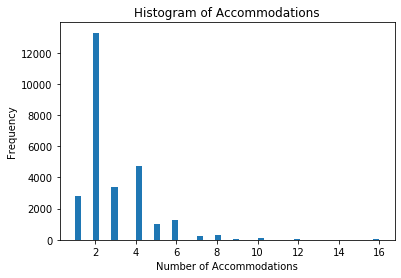

In [21]:
plt.hist(data['accommodates'], bins=50)
plt.title("Histogram of Accommodations")
plt.xlabel("Number of Accommodations")
plt.ylabel("Frequency")
plt.show()

##### We see that a majority of listings have accomodations for 1-4 people. 1 bed typically accomodates 2 individuals, so let's plot beds instead to analyze how many of the listings are single bedroom listings.

In [47]:
# explore distribution of beds

print('Number of Unique Beds: ', np.unique(data['beds']))
for i in range(1, 17):
    print('Beds {}:'.format(i), len(data[data['beds'] == i]))

Number of Unique Beds:  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 16. 50. 60.]
Beds 1: 17932
Beds 2: 5902
Beds 3: 1816
Beds 4: 621
Beds 5: 249
Beds 6: 118
Beds 7: 41
Beds 8: 23
Beds 9: 3
Beds 10: 20
Beds 11: 4
Beds 12: 9
Beds 13: 1
Beds 14: 15
Beds 15: 0
Beds 16: 27


C:\Users\wikie\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\wikie\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


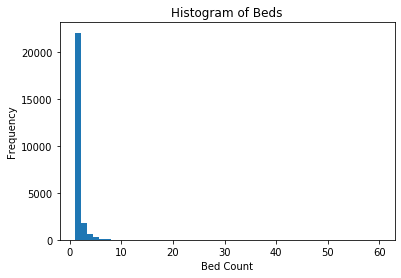

In [106]:
# Visualize the distribution of beds
plt.hist(data['beds'], bins=50)
plt.title("Histogram of Beds")
plt.xlabel("Bed Count")
plt.ylabel("Frequency")
plt.show()

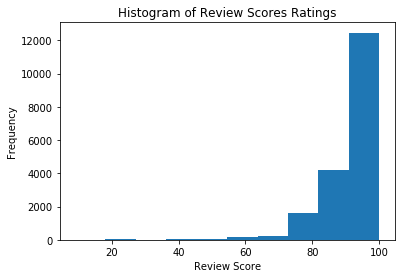

In [24]:
# visualize distribution of review scores ratings
plt.hist(data['review_scores_rating'][~data['review_scores_rating'].isnull()])
plt.title("Histogram of Review Scores Ratings")
plt.xlabel("Review Score")
plt.ylabel("Frequency")
plt.show()

### 7. Convert NaN scores with 0 reviews into 'No Reviews'

In [25]:
idx_vals = data['review_scores_rating'][data['number_of_reviews'] == 0].index.values.tolist()
data.loc[idx_vals, 'review_scores_rating'] = data['review_scores_rating'][data['number_of_reviews'] == 0].replace(np.nan, 'No Reviews')

In [48]:
data.head(10)

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,3390972,3958798,1001.0,Apartment,Entire home/apt,6.0,1,3.0,3.0,Real Bed,$250.00,1.0,11,15.0,73.0,2.0
1,4335133,22218694,1003.0,Apartment,Entire home/apt,2.0,1,0.0,1.0,Futon,$190.00,4.0,29,4.0,95.0,2.0
2,3786960,1567575,10001.0,Apartment,Private room,1.0,1,1.0,1.0,Real Bed,$89.00,3.0,27,10.0,88.0,2.0
3,4816516,24103546,10001.0,Apartment,Private room,1.0,1,1.0,1.0,Real Bed,$80.00,3.0,30,0.0,NaN,1.0
4,403068,1417227,10001.0,Loft,Private room,1.0,0,1.0,1.0,Real Bed,$85.00,1.0,21,89.0,95.0,2.0
5,693955,3550417,10001.0,Apartment,Shared room,1.0,1,1.0,1.0,Couch,$97.00,1.0,28,24.0,94.0,6.0
6,3155170,10265682,10001.0,Apartment,Shared room,1.0,1,1.0,1.0,Pull-out Sofa,$89.00,3.0,0,1.0,89.0,1.0
7,2386897,169683,10001.0,Apartment,Private room,1.0,1,1.0,1.0,Real Bed,$99.00,1.0,29,46.0,95.0,4.0
8,4541438,23550509,10001.0,Apartment,Shared room,1.0,1,1.0,1.0,Real Bed,$49.00,1.0,24,4.0,80.0,1.0
9,4707077,20531037,10001.0,Apartment,Private room,1.0,1,1.0,1.0,Real Bed,$150.00,1.0,0,0.0,NaN,1.0


In [49]:
# remove inconsistent NaN values
data = data[~data['review_scores_rating'].isnull()]

In [51]:
len(data)

18246

### 8. Convert review_scores_rating into different bucket

In [55]:
def convert_scores_buckets(val):
    if val == 'No Reviews':
        return 'No Reviews'
    elif val >= 95.0:
        return '95-100'
    elif val >= 90.0 and val < 95.0:
        return '90-94'
    elif val >= 85.0 and val < 90.0:
        return '85-89'
    elif val >= 80.0 and val < 85.0:
        return '80-84'
    elif val >= 70.0 and val < 80.0:
        return '70-79'
    elif val >= 60.0 and val < 70.0:
        return '60-69'
    elif val >= 50.0 and val < 60.0:
        return '50-59'
    elif val >= 40.0 and val < 50.0:
        return '40-49'
    elif val >= 30.0 and val < 40.0:
        return '30-39'
    elif val >= 20.0 and val < 30.0:
        return '20-29'
    elif val >= 10.0 and val < 20.0:
        return '10-19'
    elif val < 10.0:
        return '0-9'

In [56]:
data['review_scores_rating'] = data['review_scores_rating'].apply(convert_scores_buckets)
print ('Unique Values in the Column:', np.unique(data['review_scores_rating']))

Unique Values in the Column: ['20-29' '30-39' '40-49' '50-59' '60-69' '70-79' '80-84' '85-89' '90-94'
 '95-100']


In [107]:
data.head(10)

,id,host_id,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,minimum_nights,availability_30,number_of_reviews,review_scores_rating,host_listing_count
0,"Brooklyn sheepshead bay""",40.58,14072,$10.00,2,5,4 days ago,20.0,50.0,80,8000.0,10.0,10,NaN,NaN,NaN
1,"an/ll/lol/""",40.6498,14072,$0.00,1,5,2 months ago,30.0,60.0,90,8000.0,NaN,NaN,NaN,NaN,NaN
2,2953058,1.1775e+06,11205,House,Entire home/apt,16,6,5.0,5.0,Real Bed,8000.0,1.0,30,0.0,NaN,9.0
3,4300856,2.15535e+07,10280,Boat,Entire home/apt,10,5,5.0,6.0,Real Bed,6950.0,1.0,30,0.0,NaN,1.0
4,2203559,1.12426e+07,10002,Loft,Entire home/apt,8,2.5,3.0,3.0,Real Bed,6500.0,1.0,0,0.0,NaN,1.0
5,2271504,1.15984e+07,11238,Apartment,Entire home/apt,7,2,3.0,4.0,Real Bed,6500.0,1.0,0,0.0,NaN,1.0
6,1759185,9.24901e+06,10016,Apartment,Private room,2,1,1.0,1.0,Real Bed,6000.0,1.0,30,0.0,NaN,1.0
7,2176166,5.85108e+06,10036,Apartment,Entire home/apt,4,1,2.0,2.0,Real Bed,6000.0,1.0,0,0.0,NaN,1.0
8,2243699,1.48332e+06,10013,Apartment,Entire home/apt,16,3,5.0,16.0,Real Bed,5250.0,1.0,0,0.0,NaN,1.0
9,1448703,213266,10012,Apartment,Entire home/apt,3,1,1.0,2.0,Real Bed,5000.0,1.0,30,2.0,76.0,1.0


In [58]:
print ('Number of remaining records:', len(data))

Number of remaining records: 18246


### 9. Encode categorical variables

In [59]:
property_dummies = pd.get_dummies(data['property_type'])
room_dummies = pd.get_dummies(data['room_type'])
bed_dummies = pd.get_dummies(data['bed_type'])

### 10. Replace the old columns with our new one-hot encoded ones

In [60]:
df = pd.concat((data.drop(['property_type', 'room_type', 'bed_type'], axis=1), \
     property_dummies.astype(int), room_dummies.astype(int), bed_dummies.astype(int)), \
     axis=1)

print ('Number of Columns:', len(df.columns))

Number of Columns: 36


### 11. Move target predictor 'price' to the end of the dataframe

In [61]:
cols = list(df.columns.values)
idx = cols.index('price')
rearrange_cols = cols[:idx] + cols[idx+1:] + [cols[idx]]
df = df[rearrange_cols]

### 12. Convert non-categorical variables to floats and normalize

In [62]:
def normalize(col):
    mean = np.mean(col)
    std = np.std(col)
    return col.apply(lambda x: (x - mean) / std)

non_cat_vars = ['accommodates', 'bedrooms', 'beds', 'number_of_reviews', 'host_listing_count', 'availability_30', 'minimum_nights', 'bathrooms']
for col in non_cat_vars:
    df[col] = df[col].astype(float)
    df[col] = normalize(df[col])

In [63]:
df.head()

,id,host_id,zipcode,accommodates,bathrooms,bedrooms,beds,minimum_nights,availability_30,number_of_reviews,...,Villa,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,price
0,3390972,3958798,1001.0,1.729078,-0.301614,2.924737,1.247986,-0.649894,-0.478812,0.018920,...,0,1,0,0,0,0,0,0,1,$250.00
1,4335133,22218694,1003.0,-0.544051,-0.301614,-1.757751,-0.483301,0.643044,1.008221,-0.510986,...,0,1,0,0,0,0,1,0,0,$190.00
2,3786960,1567575,10001.0,-1.112333,-0.301614,-0.196921,-0.483301,0.212065,0.842996,-0.221946,...,0,0,1,0,0,0,0,0,1,$89.00
4,403068,1417227,10001.0,-1.112333,-3.144204,-0.196921,-0.483301,-0.649894,0.347318,3.583738,...,0,0,1,0,0,0,0,0,1,$85.00
5,693955,3550417,10001.0,-1.112333,-0.301614,-0.196921,-0.483301,-0.649894,0.925608,0.452479,...,0,0,0,1,0,1,0,0,0,$97.00


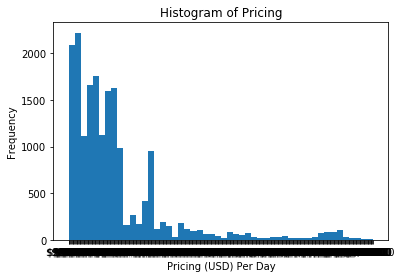

In [108]:
# visualize distribution of price (target variable)
plt.hist(df['price'], bins=50)
plt.title("Histogram of Pricing")
plt.xlabel("Pricing (USD) Per Day")
plt.ylabel("Frequency")
plt.show()